In [1]:
print('Номер варіанту:', ord('Y') % 3 + 1)

Номер варіанту: 3


In [2]:
# function to get specified column in CSV file
import numpy as np
import csv

def get_csv_col(filename, col_name):
    with open(filename) as file:
        reader = csv.reader(file, delimiter=',')
        header = next(reader)
        column = list(reader)
        return np.array(column)[:,header.index(col_name)]

In [3]:
# losses of armored personnel carriers
apc_loses = get_csv_col('russia_losses_equipment.csv', 'APC').astype(int)

print(apc_loses)

[17222 17170 17132 17093 17080 17077 17071 17063 17043 17003 16955 16938
 16925 16906 16897 16878 16878 16869 16848 16821 16786 16760 16736 16722
 16699 16681 16667 16648 16631 16620 16599 16567 16542 16521 16495 16480
 16473 16461 16426 16402 16385 16368 16363 16350 16341 16332 16323 16294
 16286 16255 16238 16211 16203 16161 16141 16103 16095 16074 16050 16039
 16013 16000 15980 15963 15917 15902 15883 15871 15862 15826 15811 15779
 15755 15732 15715 15704 15685 15645 15629 15611 15600 15583 15566 15550
 15524 15505 15480 15459 15450 15431 15413 15398 15383 15372 15337 15319
 15307 15287 15269 15263 15234 15208 15187 15176 15144 15131 15105 15096
 15076 15036 15020 15002 14980 14947 14935 14913 14891 14858 14818 14803
 14786 14775 14748 14721 14699 14665 14630 14595 14552 14538 14508 14460
 14417 14375 14353 14313 14281 14246 14227 14213 14179 14156 14129 14096
 14067 14046 14007 13991 13971 13957 13942 13928 13916 13904 13896 13873
 13852 13835 13827 13809 13796 13765 13745 13698 13

In [4]:
# daily losses of armored personnel carriers
apc_daily_loses = np.negative(np.diff(apc_loses))

print(apc_daily_loses)

[ 52  38  39  13   3   6   8  20  40  48  17  13  19   9  19   0   9  21
  27  35  26  24  14  23  18  14  19  17  11  21  32  25  21  26  15   7
  12  35  24  17  17   5  13   9   9   9  29   8  31  17  27   8  42  20
  38   8  21  24  11  26  13  20  17  46  15  19  12   9  36  15  32  24
  23  17  11  19  40  16  18  11  17  17  16  26  19  25  21   9  19  18
  15  15  11  35  18  12  20  18   6  29  26  21  11  32  13  26   9  20
  40  16  18  22  33  12  22  22  33  40  15  17  11  27  27  22  34  35
  35  43  14  30  48  43  42  22  40  32  35  19  14  34  23  27  33  29
  21  39  16  20  14  15  14  12  12   8  23  21  17   8  18  13  31  20
  47  19  12  47  45  24  54  38  73  18  18  29  17  20  20  27  21   9
  24  25  28  19  37  16   9  35  17  24  24  11  17  20  27  24  27  25
  19  51  40  28  21  28  29  30  44  14  16  37  16  15  37  35  70  36
  34  53  16  39  47  39  27  21  14  21  22  20  22  35   4  13  13  19
  16  32  29  25  19  15  16  42  31  59  23  11  1

In [5]:
# 5 largest daily losses of armored personnel carriers
top_five_daily_loses = np.sort(apc_daily_loses)[::-1][:5]

print(top_five_daily_loses)

[190 120 110  96  91]


In [6]:
# the number of armored personnel carriers destroyed in the summer of 2023
dates = get_csv_col('russia_losses_equipment.csv', 'date').astype('datetime64[D]')
start_date = np.datetime64('2023-06-01')
end_date = np.datetime64('2023-08-31')
indexes = np.where((dates >= start_date) & (dates <= end_date))

print(apc_daily_loses[indexes].sum())

1132


In [7]:
# average value of destroyed armored personnel carriers for 100-500 days of war
average_loses = np.average(apc_daily_loses[-500:-100])

print(average_loses)

11.435


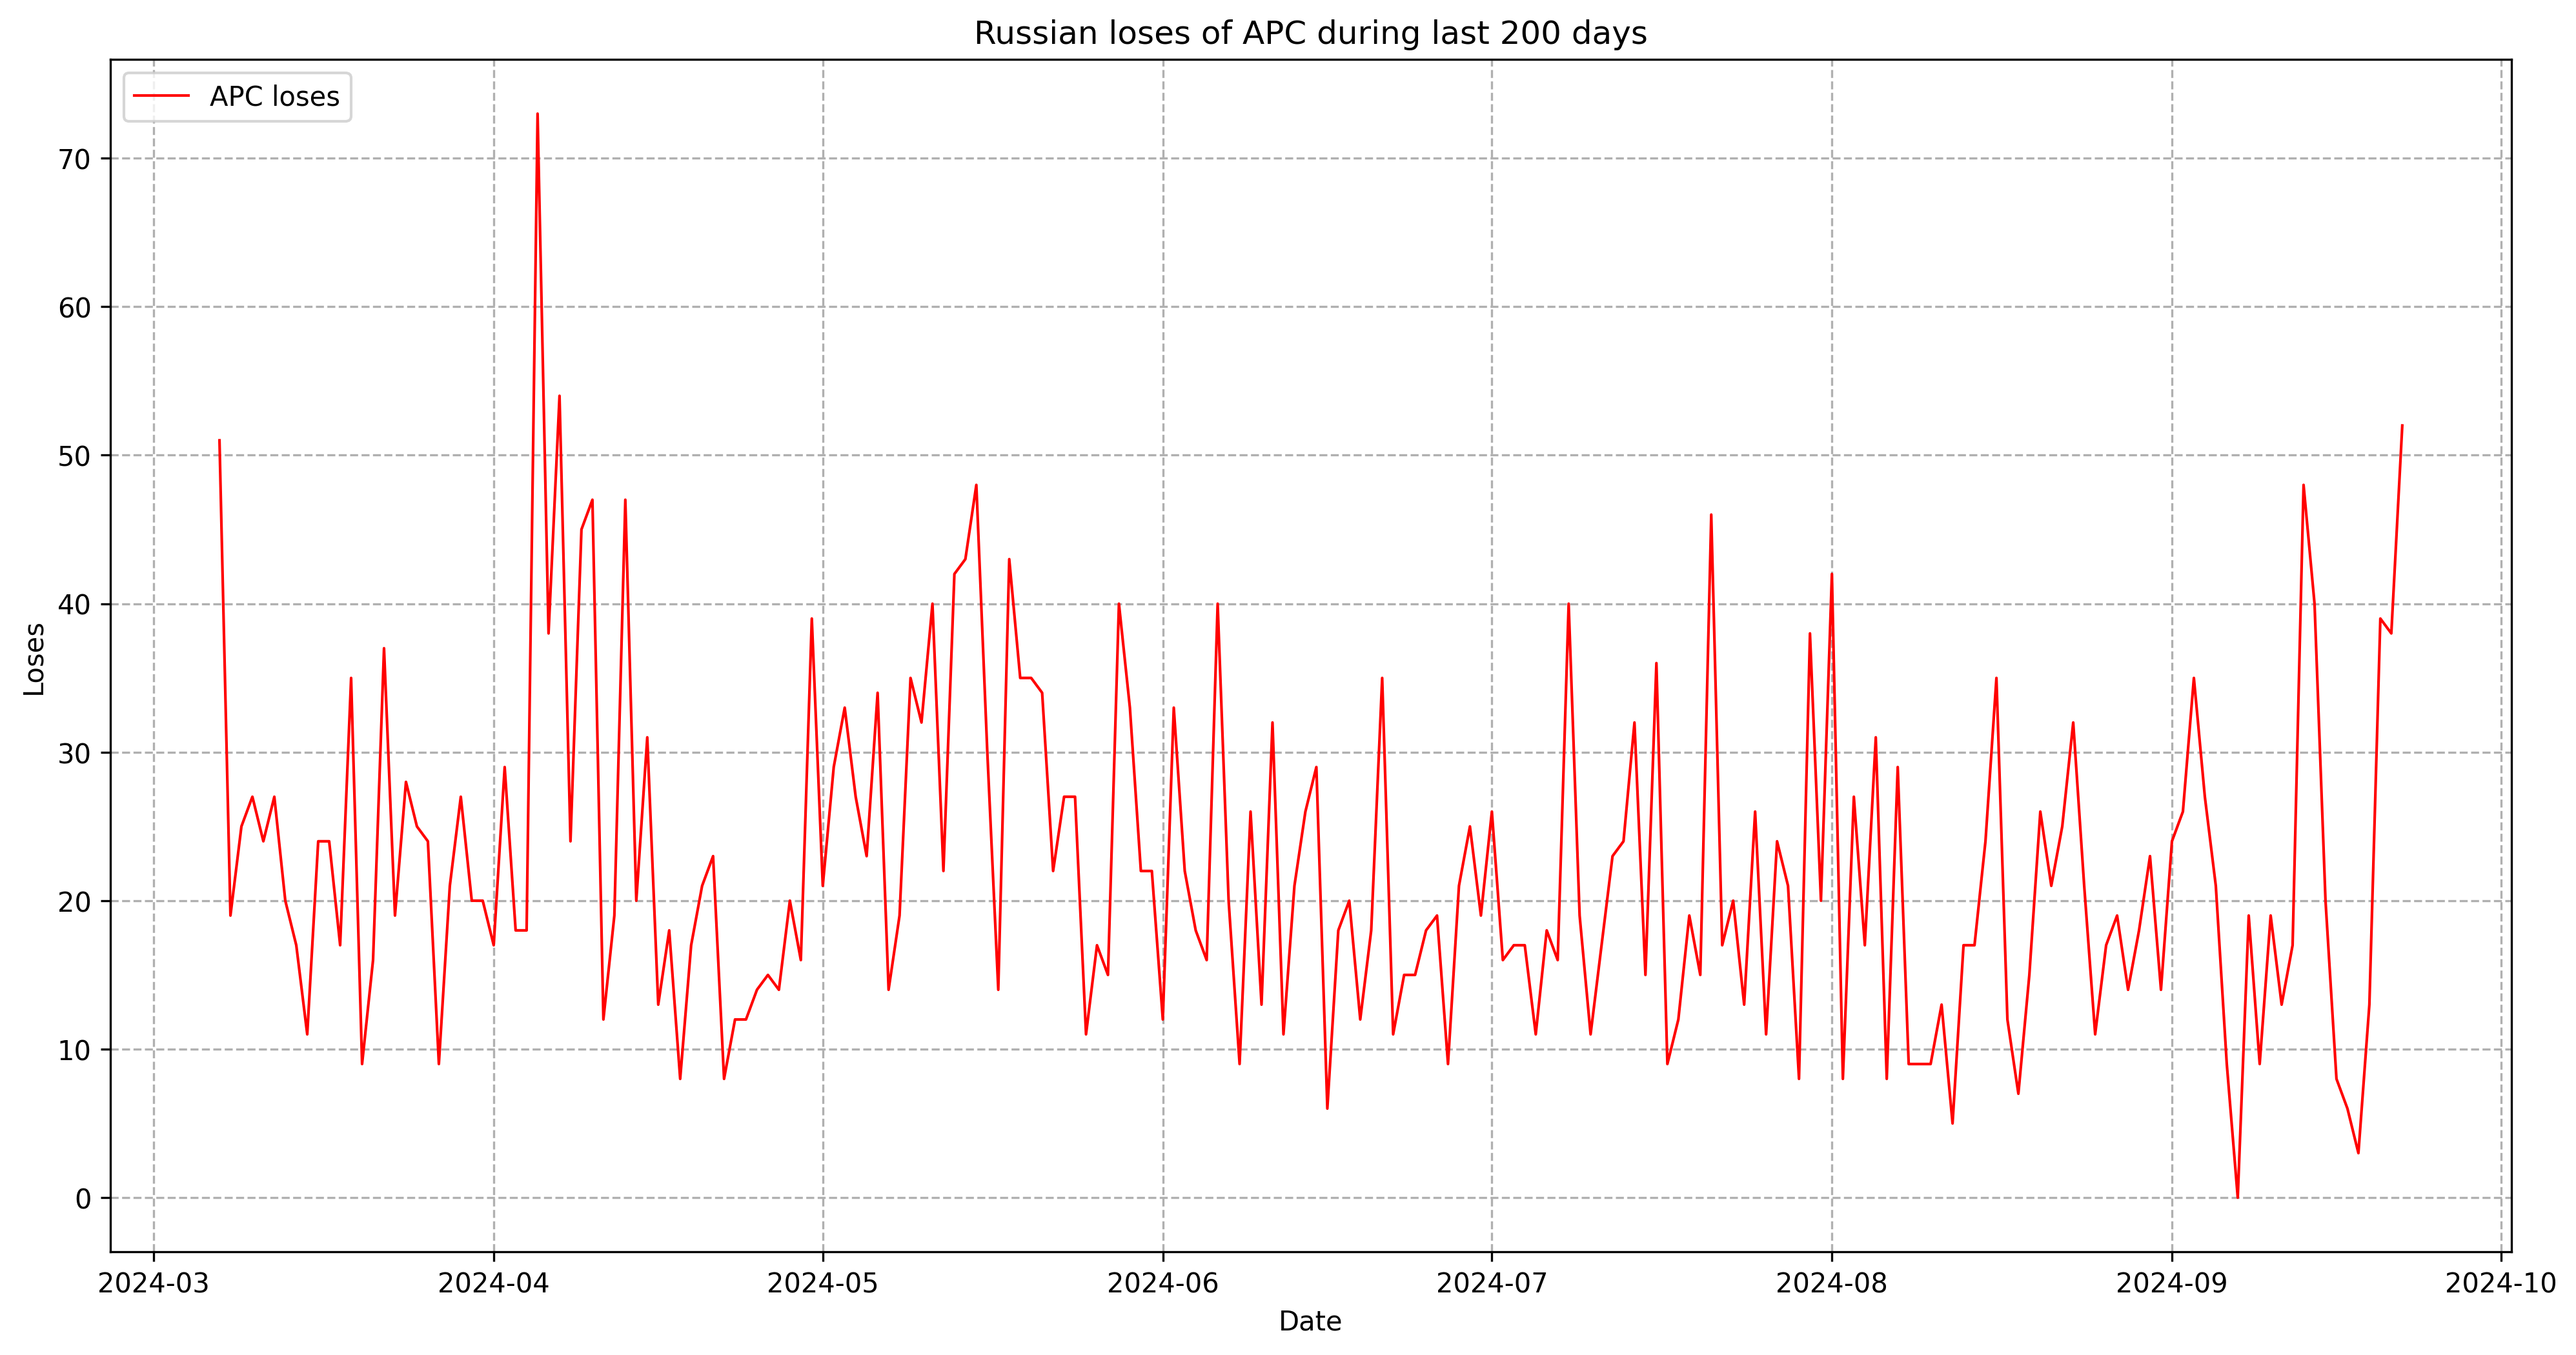

In [8]:
# plot of APC losses for the last 200 days (starting from the last date in the data set)
import matplotlib.pyplot  as plt

x_axis = dates[:200]
y_axis = apc_daily_loses[:200]

plt.figure(figsize=(16, 8), dpi=300)
plt.plot(x_axis, y_axis, linewidth=1, color='r', linestyle='-', label='APC loses')
plt.title('Russian loses of APC during last 200 days')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Loses')
plt.grid(linestyle='--')
plt.savefig('plot.png')

plt.show()